In [150]:
import pandas as pd
import pickle
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor 

In [115]:
data=pd.read_csv('quikr_car.csv')
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [116]:
data.shape

(892, 6)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [118]:
data.isnull().sum()


name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [119]:
data=data[data['year'].str.isnumeric()]

In [120]:
data['year']=data['year'].astype(int)

In [121]:
data=data[data['Price']!="Ask For Price"]

In [122]:
data['Price']=data['Price'].str.replace(',','').astype(int)

In [123]:
data['kms_driven']=data['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [124]:
data=data[data['kms_driven'].str.isnumeric()]

In [125]:
data['kms_driven']=data['kms_driven'].astype(int)

In [126]:
data=data[~data['fuel_type'].isna()]

In [127]:
data['name']=data['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [128]:
data=data[data['Price']<6000000].reset_index(drop=True)

In [129]:
data.to_csv('Cleanedcar data.csv')

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int32 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    int32 
 5   fuel_type   815 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [131]:
data.describe(include="all")

,name,company,year,Price,kms_driven,fuel_type
count,815,815,815.000000,8.150000e+02,815.000000,815
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.442945,4.017933e+05,46277.096933,NaN
std,NaN,NaN,4.005079,3.815888e+05,34318.459638,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56879.000000,NaN


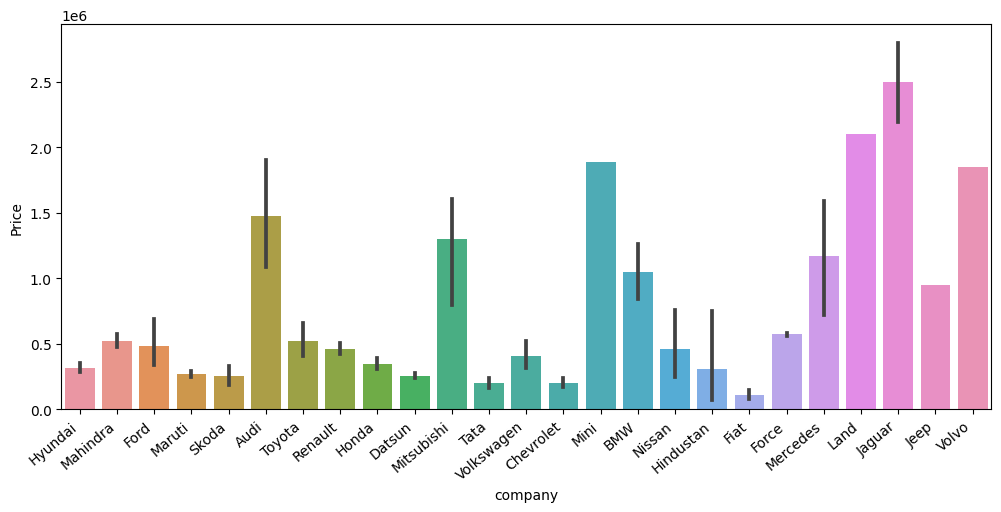

In [132]:
## Relationshio of company with Price

import matplotlib.pyplot as plt
plt.subplots(figsize=(12,5))
ax=sns.barplot(x='company',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

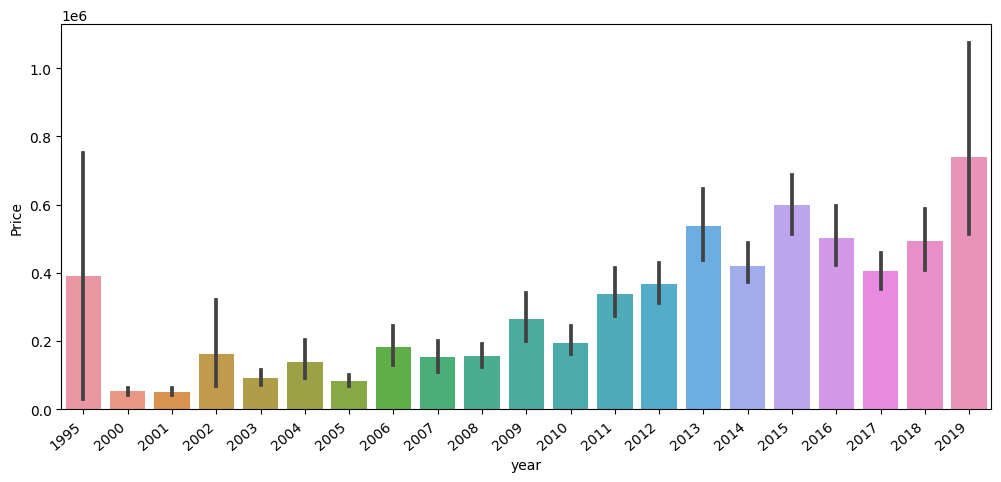

In [133]:
## Relationship of year with Price

plt.subplots(figsize=(12,5))
ax=sns.barplot(x='year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


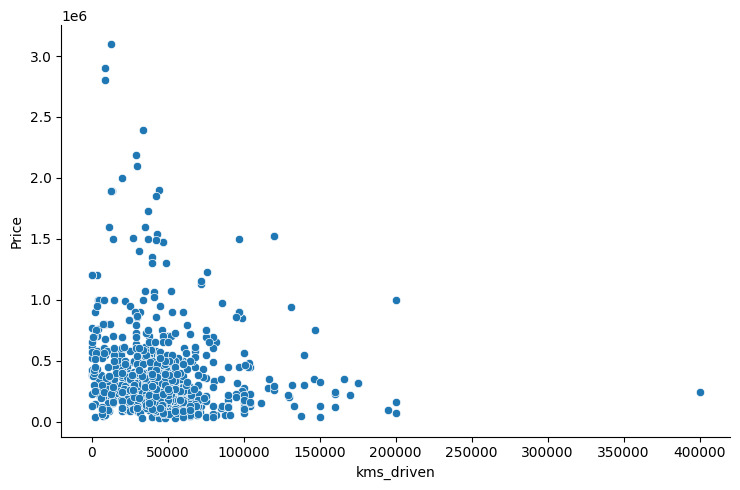

In [134]:
## Relationship of kms_driven with price

sns.relplot(x='kms_driven',y='Price',data=data,height=5,aspect=1.5)

<AxesSubplot: xlabel='fuel_type', ylabel='Price'>

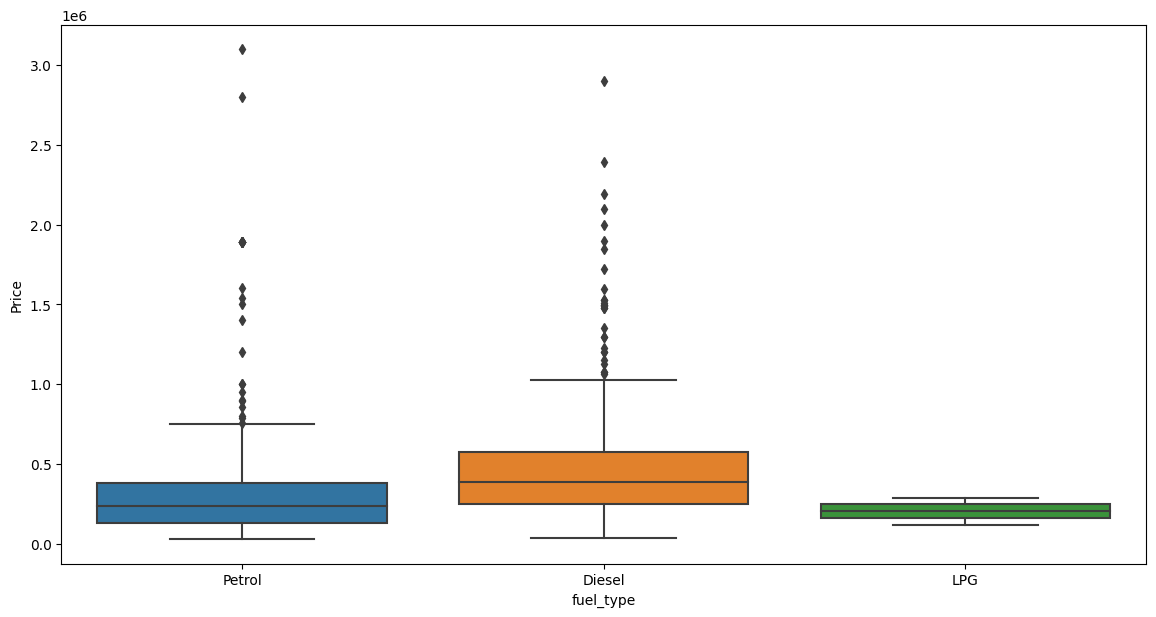

In [135]:
## relationship of fuel type with price

plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=data)

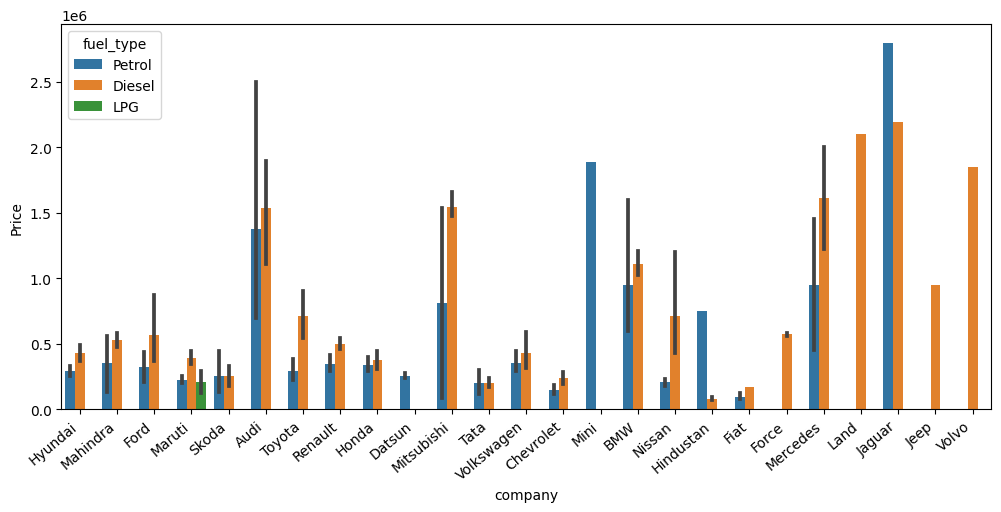

In [136]:
##Relationship of price with year and company 

plt.subplots(figsize=(12,5))
ax=sns.barplot(x='company',y='Price',data=data,hue='fuel_type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


In [159]:
X=data[['name','company','year','kms_driven','fuel_type']]
y=data['Price']

In [160]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [161]:
# x=data.drop(['Price'],axis=1)
# y=data['Price']

In [162]:
ohn=OneHotEncoder()
ohn.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [163]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohn.categories_),['name','company','fuel_type']),remainder="passthrough")

In [164]:
lin_reg_model=LinearRegression()
pipe=make_pipeline(column_trans,lin_reg_model)

In [165]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [166]:
y_pred=pipe.predict(x_test)

In [167]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.745790880335105

In [168]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lin_reg_model=LinearRegression()
    pipe=make_pipeline(column_trans,lin_reg_model)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score)

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
lin_reg_model=LinearRegression()
pipe=make_pipeline(column_trans,lin_reg_model)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.5926370421018297

In [147]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [148]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([431098.74055388])

In [149]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese